#**LIBRARIES**

In [1]:
import math
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from multiprocessing.dummy import Pool as ThreadPool

# **INICIALIZAN VARIABLES**

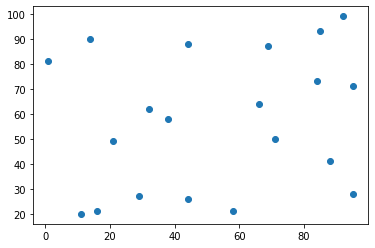

In [2]:
# Definir el número de ciudades a visitar.
n_cities = 20
# Generar las coordenadas para n ciudades.
cities = np.random.randint(1, 100, size=(n_cities, 2))
# Se toman los valores del eje 'x' y eje 'y'
cx = cities[:, 0]
cy = cities[:, 1]
# Se plotean las ciudades
fig, ax = plt.subplots()
ax.scatter(cx, cy)

# **DEFINIR FUNCIONES**

In [3]:
def recocido (T0, a, L, Tf):
    T = T0
    soluciones = []
    Sa = genera_solucion_inicial()
    soluciones.append(Sa)
    while T >= Tf:
        for count in range(L):
            Sc = genera_vecino_aleatorio(Sa)
            soluciones.append(Sc)
            d = cost(Sc)-cost(Sa)
            if np.random.uniform(0,1) < math.exp(-d/T) or d < 0:
                Sa = Sc
        T = T*a
    return Sa

In [4]:
def cost(ruta):
    cost = 0
    for vend in ruta:
        for x in range(-1,3):
            cost += math.sqrt((vend[x][0] - vend[x+1][0])**2 + abs(vend[x][1] - vend[x+1][1])**2)
    return cost

In [5]:
def genera_vecino_aleatorio(ruta):
    aux = np.copy(ruta)
    Xa = np.random.randint(0,5)
    Xb = np.random.randint(0,5)
    Ya = np.random.randint(0,4)
    Yb = np.random.randint(0,4)

    aux2 = np.copy(aux[Xa][Ya])
    aux[Xa][Ya] = np.copy(aux[Xb][Yb])
    aux[Xb][Yb] = aux2

    return aux

In [6]:
def genera_solucion_inicial():
    np.random.shuffle(cities)
    arr = np.reshape(cities, (5,4,2))
    return arr

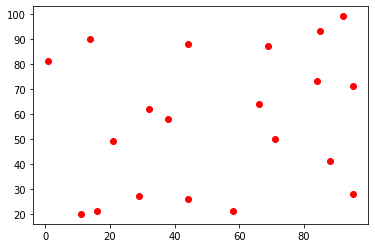

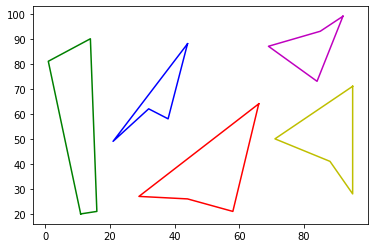

In [8]:
def graficarMejorSolucion(caminos, ciudades):
    aux = np.append(caminos[0],caminos[0][0])
    #print(aux)
    #a.append(np.reshape(aux, (5,2)))
    #print(np.reshape(aux, (5,2)))
    caminos = [np.reshape(np.append(cam,cam[0]), (5,2)) for cam in caminos]
    
    aux = caminos
    cx = ciudades[:, 0]
    cy = ciudades[:, 1] 

    s = plt.scatter(cx, cy, c='r')

    fig, ax = plt.subplots()
    ax.plot(aux[0][:,0], aux[0][:,1], c='r')
    ax.plot(aux[1][:,0], aux[1][:,1], c='g')
    ax.plot(aux[2][:,0], aux[2][:,1], c='b')
    ax.plot(aux[3][:,0], aux[3][:,1], c='y')
    ax.plot(aux[4][:,0], aux[4][:,1], c='m')
    
    #return(a)

graficarMejorSolucion(recocido(40,.9,10, .1),cities)

In [ ]:
a=[]
a=pd.DataFrame(np.concatenate(a))
a.reset_index(inplace=True)
